<a href="https://colab.research.google.com/github/mikhail-mat/mit-ocw_hands-on-deep-learning/blob/main/predicting_heart_disease_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease from structured tabular data using a neural network

## First steps

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
keras.utils.set_random_seed(42)

In [5]:
url = 'http://storage.googleapis.com/download.tensorflow.org/data/heart.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

## Preprocessing

In [10]:
all_cols = [col for col in df.columns if col != 'target']
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']
cat_cols = [col for col in all_cols if col not in num_cols]

In [11]:
preprocessing = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_cols),
    ('num', StandardScaler(), num_cols)
])

In [12]:
X_train_df = pd.DataFrame(X_train, columns=all_cols)
X_test_df = pd.DataFrame(X_test, columns=all_cols)

In [13]:
X_train = preprocessing.fit_transform(X_train_df)
X_test = preprocessing.transform(X_test_df)

In [14]:
X_train.shape

(242, 29)

## Building and training a neural network

In [25]:
input = keras.layers.Input(shape=(X_train.shape[1],))
hidden = keras.layers.Dense(16, activation='relu', name='hidden')(input)
output = keras.layers.Dense(1, activation='sigmoid', name='output')(hidden)

model = keras.Model(input, output)

In [26]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

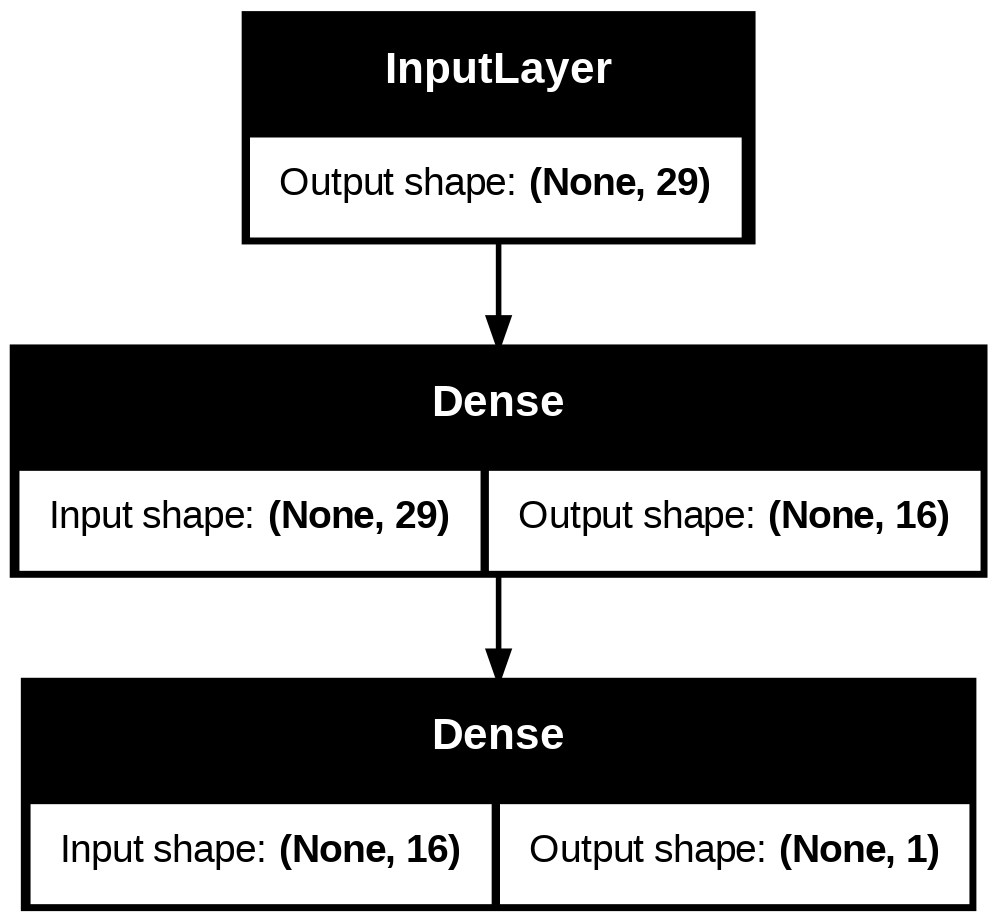

In [27]:
keras.utils.plot_model(model, show_shapes=True)

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(X_train,
          y_train,
          epochs=100,
          batch_size=32,
          verbose=1,
          validation_split=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.2877 - loss: 0.9555 - val_accuracy: 0.3265 - val_loss: 0.8709
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2879 - loss: 0.8927 - val_accuracy: 0.3878 - val_loss: 0.8167
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3093 - loss: 0.8401 - val_accuracy: 0.4082 - val_loss: 0.7682
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3271 - loss: 0.7930 - val_accuracy: 0.4286 - val_loss: 0.7245
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3994 - loss: 0.7511 - val_accuracy: 0.4898 - val_loss: 0.6854
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4705 - loss: 0.7136 - val_accuracy: 0.6122 - val_loss: 0.6503
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5251 - loss: 0.6804 - val_accuracy: 0.7143 - val_loss: 0.6191
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6318 - loss: 0.6503 - val_accuracy: 0.7755 - val_loss:

## Evaluating the model

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

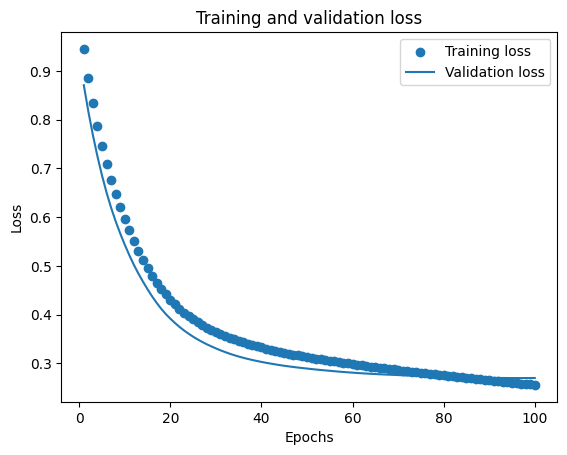

In [31]:
epochs = range(1, len(history_dict['loss'])+1)
plt.scatter(epochs, history_dict['loss'], label='Training loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

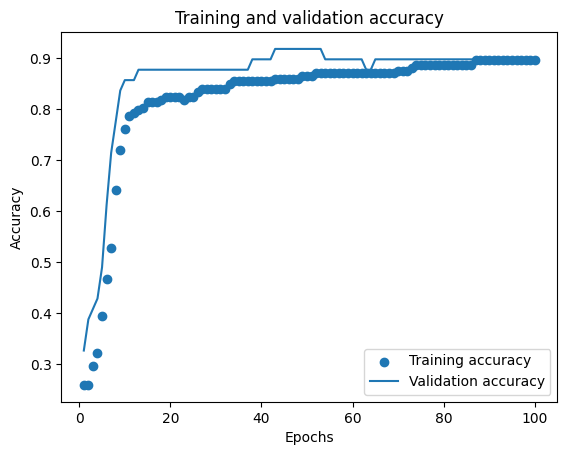

In [32]:
plt.scatter(epochs, history_dict['accuracy'], label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8496 - loss: 0.3330


[0.3320237994194031, 0.8524590134620667]